# **Анализ данных по продажам компьютерных игр, выявление закономерностей, определяющих успешность игр.**

**У нас есть данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). В ходе выполнения проекта нужно будет выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from math import sqrt
from math import factorial
from matplotlib import pyplot as plt
from scipy.stats import binom, norm

#### Шаг 1. Загрузка данных и изучение общей информации

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**В данных видим:**
- единичные пропуски в столбцах с и `Year_of_Release` и большое количество пропусков в столбцах `Critic_Score`, `User_Score`, `Rating`, причём по первым же строкам тамблицы видно совпадение пропусков по этим столбцам, то есть хоть явно и не все, так как количество пропусков в столбцах разное, но многие точно находятся в одних и тех же строках, видимо произошла какая-то ошибка при выгрузке данных;
- Неверные типы данных в столбце  `Year_of_Release`, `User_Score`;
- названия столбцов нужно привести к нижнему регистру.

#### Шаг 2. Предобработка данных

**В ходе предобработки данных выполним следующее:**
- заменим названия столбцов (приведём к нижнему регистру);
- преобразуем данные в нужные типы;
- обработаем пропуски;
- посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [5]:
data.columns=data.columns.str.lower() #приводим названия столбцов к нижнему регистру

In [6]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Обработаем пропуски в данных. По столбцам с пропусками логичной замены пропусков нет, поэтому строки с пропусками в столбцах `name`, `genre` и `year_of_release` удалим (потеря данных будет менее 2%, это для нас допустимо), а по остальным столбцам оставим пропуски без изменений, так как удаление этих строк приведёт к большой потере данных.**

In [7]:
data=data.dropna(subset = ['name', 'genre', 'year_of_release'])

In [8]:
data.info() #ознакамливаемся с данными после удаления строк с пропусками

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Приведём к int64 тип данных столбца `year_of_release`.**

In [9]:
data['year_of_release']=data['year_of_release'].astype('int')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


**Ознакомимся со значениями в столбцах `user_score` и	`rating`.**

In [11]:
for n in ['user_score', 'rating']:
          display(f'Уникальные значения столбца {n}:', data[n].unique());

'Уникальные значения столбца user_score:'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'Уникальные значения столбца rating:'

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
data[data['user_score']=='tbd'].head(20)#ознакомимся со строками со значением tbd в столбце user_score.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


**У меня было предположение, что tbd - это аббревиатура To Be Determined, т.е. "Будет определено", и это значение стоит в новых играх, которые только выпустились и ещё не успели получить оценку, но моё предположение оказалось неверным, с годом релиза связи нет, других взаимосвязей я также не обнаружил. Скорее всего это значение было присвоено по ошибке и по сути это обычные пропуски. Приведём тип данных столбца `user_score` к числовому методом `to_numeric()`, с одновременным превращением в пропуски некорректных значений.**

In [13]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Видим, что количество ненулевых значений уменьшилось почти на 2400.**

**Типы данных приведены к нужным. Теперь посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.**

In [15]:
data['all_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [16]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Проведем проверку на полные дубликаты.**

In [17]:
data.duplicated().sum()

0

**Полных дубликатов не обнаружено.**

**Проведем проверку на неявные дубликаты (строки, совпадающие по названию, платформе и году релиза одновременно).**

In [18]:
data[data.duplicated(subset=data.columns[:3], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


**Видим 1 неявный дубликат, скорее всего из-за ошибки какое-то количество продаж занесли на дубликат. Они незначительны, можно было бы просто удалить вторую строку, сильно это не повлияет, но добавим эти продажи к данным первой строки из дублей, после чего удалим дубль, оставив первый.**

In [19]:
data.loc[604, ['eu_sales', 'all_sales']]+=data.loc[16230, ['eu_sales', 'all_sales']]

In [20]:
data = data.drop_duplicates(subset=data.columns[:3], keep='first')
data.info()
data[data.duplicated(subset=data.columns[:3], keep=False)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  all_sales        16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales


**Дубликаты удалены.**

**В ходе предобработки данных мы выполнили следующее:**
- заменили названия столбцов (привели к нижнему регистру);
- преобразовали данные в нужные типы;
- обработали пропуски;
- посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

#### Шаг 3. Исследовательский анализ данных

**На данном этапе необходимо будет сделать следующее:**
- Посмотреть, сколько игр выпускалось в разные годы.
- Посмотрим, как менялись продажи по платформам, выберем платформы с наибольшими суммарными продажами и построим распределение по годам, выясним за какой характерный срок появляются новые и исчезают старые платформы?
- Возьмём данные за соответствующий актуальный период.
- Выясним, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
- Соотнесем выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. 

**Посмотрим, сколько игр выпускалось в разные годы.**

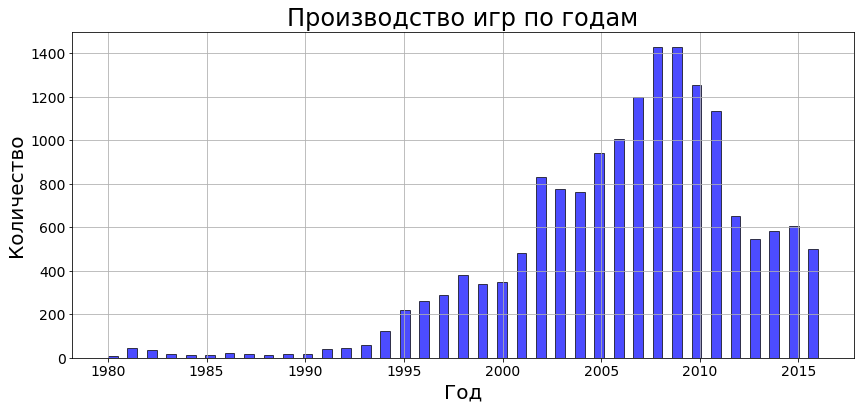

In [21]:
data['year_of_release'].plot(kind='hist', bins = 73, figsize=(14, 6), color='blue', alpha=0.7, edgecolor='black')
plt.title('Производство игр по годам', fontsize=24)
plt.xlabel('Год', fontsize=20)
plt.ylabel('Количество', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

**Видим, что пик по количеству игр был в 2008-2009 годах, было произведено более 1400 игр в год, после чего произошёл спад. Скорее всего в этот период произошло переориентация производителей игр от количества к качеству, стали выпускаться игры с более длительным сроком жизни, онлайн игры, в которые пользователи могут играть годами, а к играм производителем выпускаются обновления вместо выпуска новых игр. Также появляются подписки на игры, когда производитель получает оплату не единоразово, а регулярно.**
**По гистограмме приходим к выводу, что за все периоды информация нам не нужна, нас интересуют данные начиная с 2012 года. С этого началась "новая эпоха" игр с новыми приоритетами и начиная с этого периода количество игр в год стало производиться минимум в 2 раза меньше.**

**Посмотрим, как менялись продажи по платформам, выберем платформы с наибольшими суммарными продажами и построим распределение по годам, выясним за какой характерный срок появляются новые и исчезают старые платформы.**

In [22]:
def platf_reg(data, value):
    df = (data
    .pivot_table(index='platform', values=[value], aggfunc='sum')
    .sort_values(by=[value], ascending=False)
    )
    return df

In [23]:
data_platform = platf_reg(data, 'all_sales')
data_platform.head()

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


In [24]:
top5 = data_platform.head().index.tolist()
top5

['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [25]:
data_platform_sales = (data
                      .pivot_table(index=['platform','year_of_release'], values='all_sales', aggfunc='sum')
                      .sort_values(by='all_sales', ascending=False)
)
data_platform_sales

all_sales
platform year_of_release           
PS2      2004                211.81
Wii      2009                206.97
PS2      2002                205.38
         2003                184.31
Wii      2008                171.32
...                             ...
PC       1988                  0.03
PCFX     1996                  0.03
DC       2007                  0.02
3DO      1994                  0.02
DS       1985                  0.02

[238 rows x 1 columns]

In [26]:
colors=['blue', 'green', 'yellow', 'red', 'black']
def graf_year (d, s, c, l):
    fig, ax = plt.subplots(figsize=(14, 6))
    for n, m in zip(s, c):
        d[d['platform']==n].pivot_table(index=['year_of_release'], values=['all_sales'], aggfunc='sum').plot(ax=ax, color=m)
    plt.legend(s)
    plt.title('Динамика продаж по платформам', fontsize=24)
    plt.xlabel('Год', fontsize=20)
    plt.ylabel('Общие продажи, млн. копий', fontsize=20)
    plt.xticks(np.arange(l, 2017, 1), fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_xlim(l, 2016)
    ax.grid()
    plt.show()

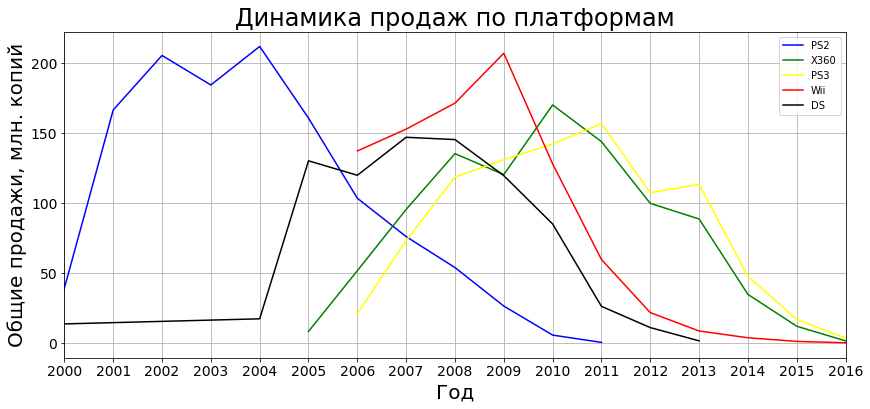

In [27]:
graf_year(data, top5, colors, 2000)

**Построен график с динамикой продаж по 5 платформам с максимальными продажами. На графике платформы DS был выброс в 1985 год, поэтому график ограничен 2000-2016 годами. По графику видим, что с момента появления платформы на максимальные продажи она выходит в течение 3-5 лет, после чего идёт спад, при котором за 5-7 лет продажи падают до нуля, то есть полный жизненный цикл платформ составляет около 10 лет. Обусловлено это тем, что выходят новые платформы, в том числе у тех же производителей, например PS2 и PS3. После 2004 года у PS2 происходит спад продаж, а в 2006 появляется PS3, которая через год выравнивается по продажам с предыдущим поколением и потом обгоняет.**

**Учитывая полученные результаты графика выпуска игр по годам, а также то, что время жизни платформы на подъёме 3-5 лет, далее будем рассматривать период начиная с 2012 года, как актуальный. Более ранний период негативно скажется на прогнозе на 2017 год. Построим график по платформам за период с 2012 года.**

In [28]:
data_2012 = data[data['year_of_release']>=2012]

In [29]:
data_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   int64  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     1311 non-null   float64
 9   user_score       1530 non-null   float64
 10  rating           1610 non-null   object 
 11  all_sales        2885 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.0+ KB


In [30]:
data_platform_2012 = (data_2012
                      .pivot_table(index='platform', values='all_sales', aggfunc='sum')
                      .sort_values(by='all_sales', ascending=False)
)
data_platform_2012

,all_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


**Получили перечень платформ, по которым есть продажи за последние несколько лет (начиная с 2012 года), однако по таблице непонятен этап жизненного цикла платформы. Получим разбивку по годам данных платформ и построим графики.**

In [31]:
platform_2012 = data_platform_2012.index.tolist()
platform_2012

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

In [32]:
colors=['blue', 'green', 'yellow', 'red', 'black', 'gray', 'olive', 'cyan', 'darkorange', 'darkviolet', 'lime']

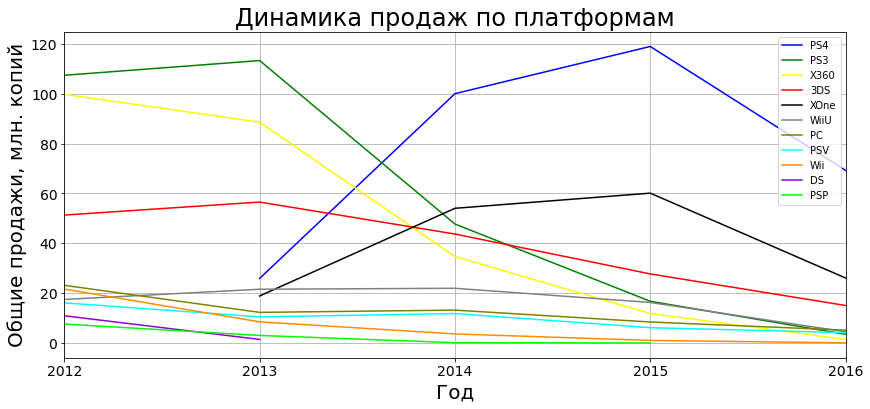

In [33]:
graf_year(data_2012, platform_2012, colors, 2012)

**Видим, что большинство платформ на спаде. Ранее мы определили, что жизненный цикл платформы составляет около 10 лет, из них 3-5 лет она находится в стадии роста. На графике видим довольно новые платформы PS4 и XOne, появившиеся в 2013 году, показывавшие рост в 2014 и 2015 году, но 2016 год на графике падение, что скорее всего обусловлено неполными данными за 2016 год. Можем считать PS4 и XOne перспективными, так как они самые новые из существующих на рынке, при этом показывали хорошие продажи начиная с 2013 года.**

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам по результатам с 2012 года.**

In [34]:
#top5_2012 = platform_2012[0:5]
#top5_2012

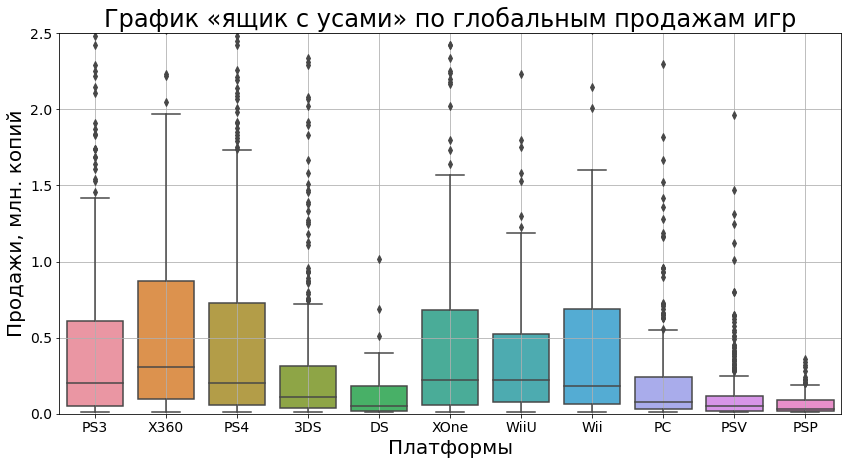

In [35]:
plt.figure(figsize=(14, 7))
#sns.boxplot(x='platform', y='all_sales', data=data_2012[data_2012['platform'].isin(top5_2012)])
sns.boxplot(x='platform', y='all_sales', data=data_2012)
plt.title('График «ящик с усами» по глобальным продажам игр', fontsize=24)
plt.xlabel('Платформы', fontsize=20)
plt.ylabel('Продажи, млн. копий', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 2.5)
plt.grid()
plt.show()

In [2]:
for n in platform_2012:
    display(n)
    display(data_2012[data_2012['platform']==n]['all_sales'].describe())

NameError: name 'platform_2012' is not defined

**Межквартильный размах по платформам - от 20-100 тыс. до 90-870 тыс проданных копий, медиана находится в пределах 30-310 тыс проданных копий. При этом наблюдаются по всем платформам большие стандартные отклонения до 1,7 млн проданных копий, что на порядок больше медианного значения, что говорит о большой вариативности данных и большом количестве выбросов.  Среднее значение также превышает в несколько раз медианное, это означает, что множество небольших значений располагается в нижней части распределения, а несколько высоких значений в верхней могут тянуть среднее вверх. Максимальное значение по каждой платформе очень сильно отличается от медианного, вплоть значений превышающих его в 100 раз.
В общем можно сказать, что есть основная масса игр, укладывающаяся в общую статистику, но существует немалое количество игр, которые "выстреливают", и их показатели продаж значительно превышают среднестатистические.**

**После изучения "ящиков с усами" мнение о перспективности платформ PS4 и XOne не меняется.**

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Для анализа возьмём платформу PS4.**

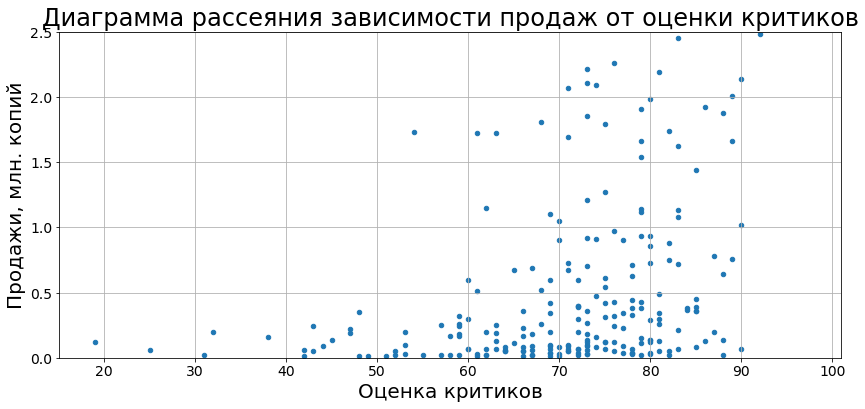

In [37]:
data_2012[data_2012['platform']=='PS4'].plot(x='critic_score', y='all_sales', kind='scatter', figsize=(14, 6));
plt.title('Диаграмма рассеяния зависимости продаж от оценки критиков', fontsize=24)
plt.xlabel('Оценка критиков', fontsize=20)
plt.ylabel('Продажи, млн. копий', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 2.5)
plt.grid()
plt.show()

In [38]:
data_2012[data_2012['platform']=='PS4']['all_sales'].corr(data_2012[data_2012['platform']=='PS4']['critic_score'])

0.406567902061781

**По диаграмме рассеяния и корреляции видим, что зависимость продаж от оценки критиков прямая, но не очень сильная.**

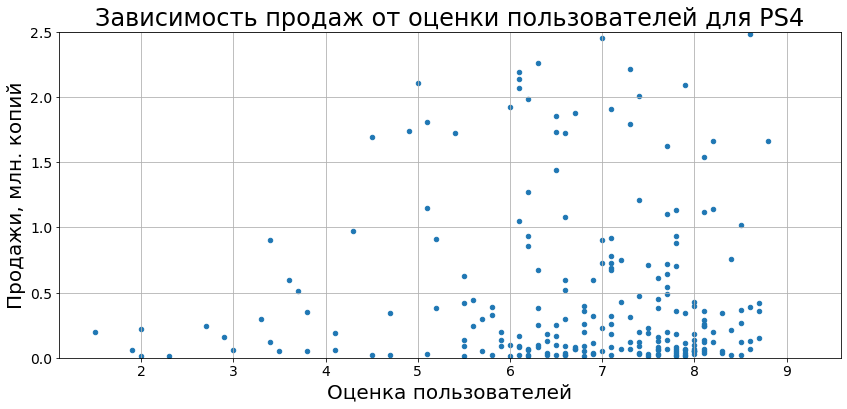

In [39]:
data_2012[data_2012['platform']=='PS4'].plot(x='user_score', y='all_sales', kind='scatter', figsize=(14, 6));
plt.title('Зависимость продаж от оценки пользователей для PS4', fontsize=24)
plt.xlabel('Оценка пользователей', fontsize=20)
plt.ylabel('Продажи, млн. копий', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 2.5)
plt.grid()
plt.show()

In [40]:
data_2012[data_2012['platform']=='PS4']['all_sales'].corr(data_2012[data_2012['platform']=='PS4']['user_score'])

-0.031957110204556376

**Видим, что в отличие от оценки критиков, оценка пользователей не влияет на продажи.**

**Построим диаграммы рассеяния и посчитаем корреляцию для остальных платформ из наших.**

In [41]:
def sc_cor (score, text):
    for p in platform_2012[1:]:
        data_2012[data_2012['platform']==p].plot(x=score, y='all_sales', kind='scatter', figsize=(8, 4));
        plt.title(f'Зависимость продаж от показателя {text} для {p}', fontsize=24)
        plt.xlabel(text, fontsize=20)
        plt.ylabel('Продажи, млн. копий', fontsize=20)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.ylim(0, 2.5)
        plt.grid()
        plt.show()
        display(f'Корреляция для платформы {p}', data_2012[data_2012['platform']==p]['all_sales'].corr(data_2012[data_2012['platform']==p][score]))

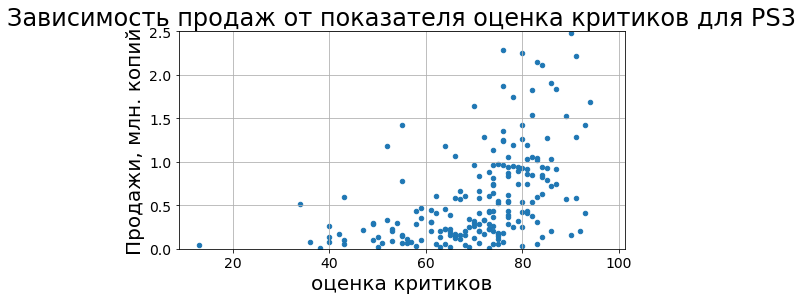

'Корреляция для платформы PS3'

0.33416558787023765

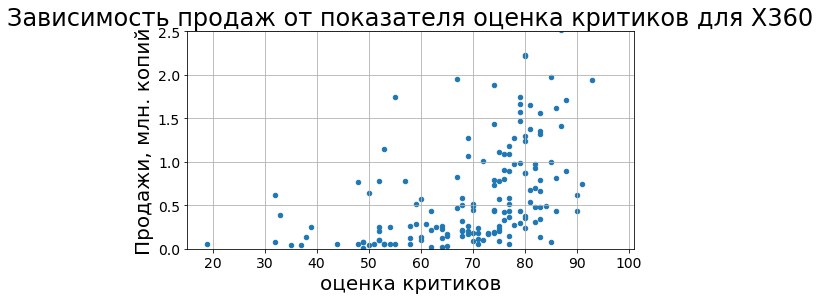

'Корреляция для платформы X360'

0.36057348885073365

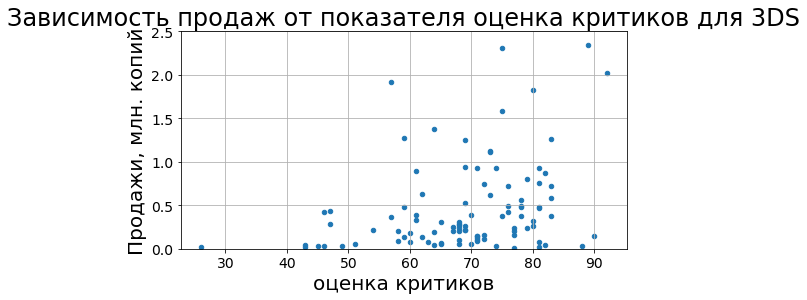

'Корреляция для платформы 3DS'

0.32080286953607845

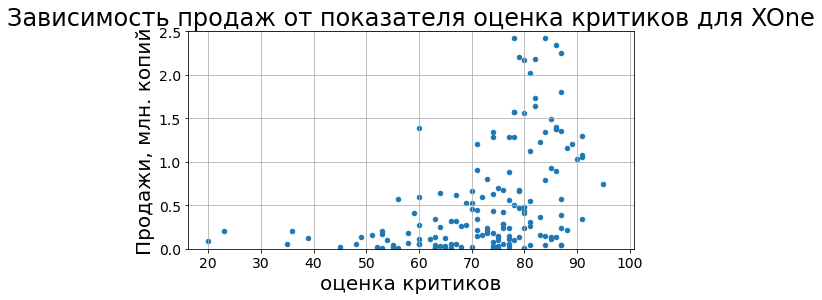

'Корреляция для платформы XOne'

0.41699832800840175

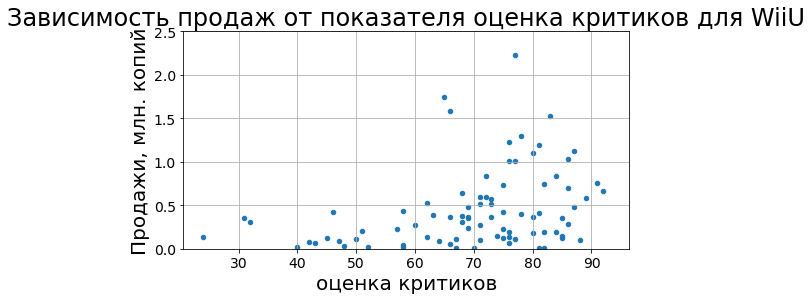

'Корреляция для платформы WiiU'

0.3483797601201749

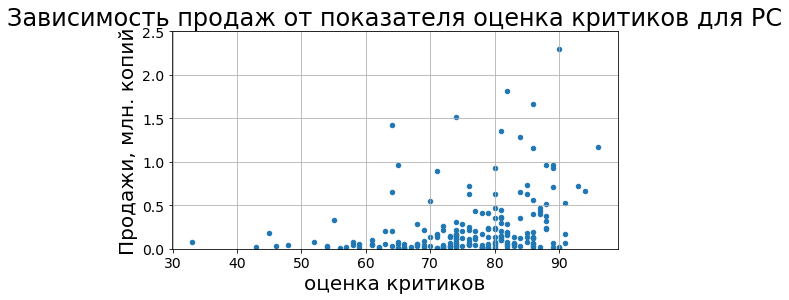

'Корреляция для платформы PC'

0.23724324311567918

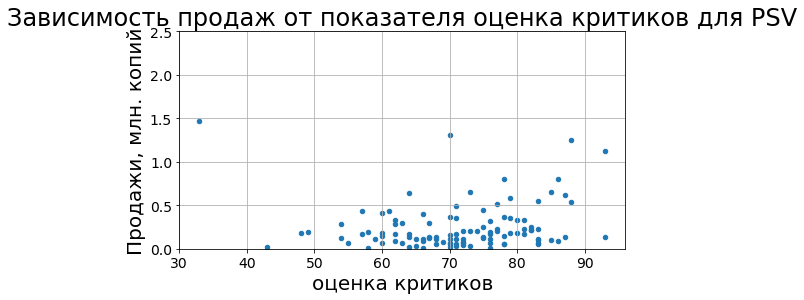

'Корреляция для платформы PSV'

0.09448789929316172

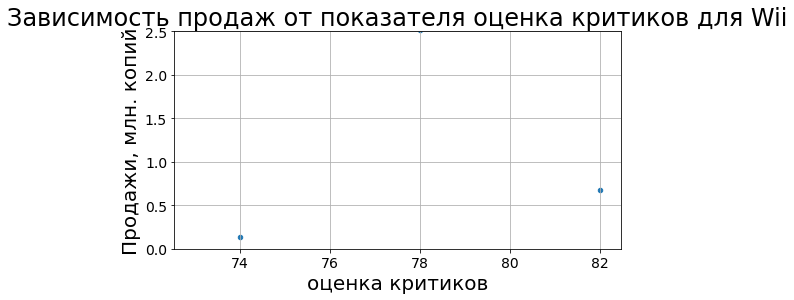

'Корреляция для платформы Wii'

-0.4243413011077495

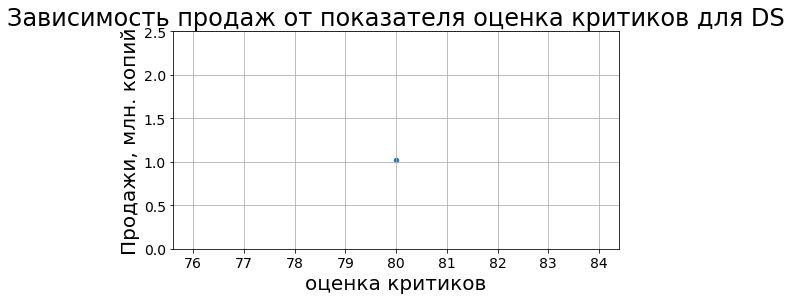

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


'Корреляция для платформы DS'

nan

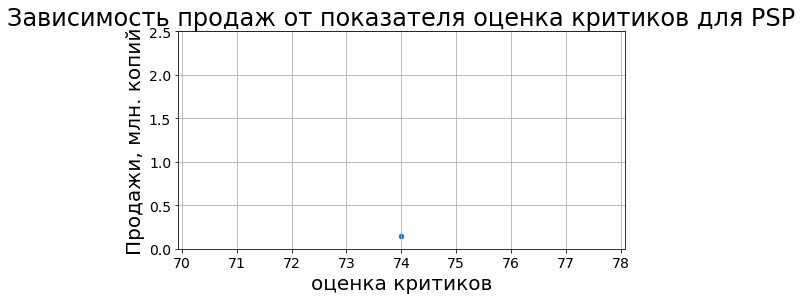

'Корреляция для платформы PSP'

nan

In [42]:
sc_cor('critic_score', 'оценка критиков')

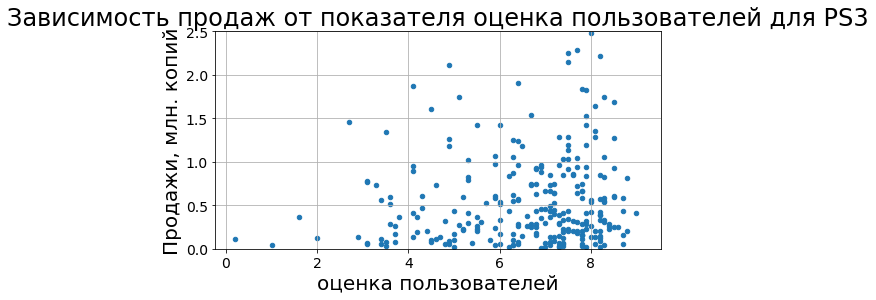

'Корреляция для платформы PS3'

-0.006217851960559279

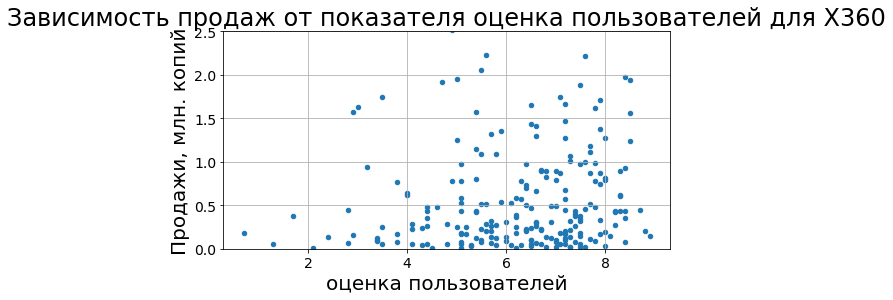

'Корреляция для платформы X360'

0.0061639786462133256

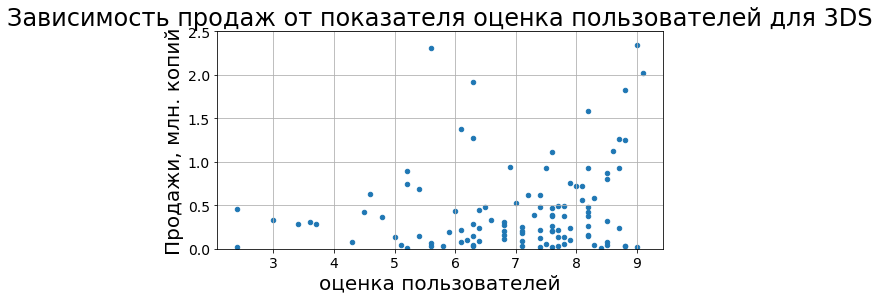

'Корреляция для платформы 3DS'

0.19758263411038596

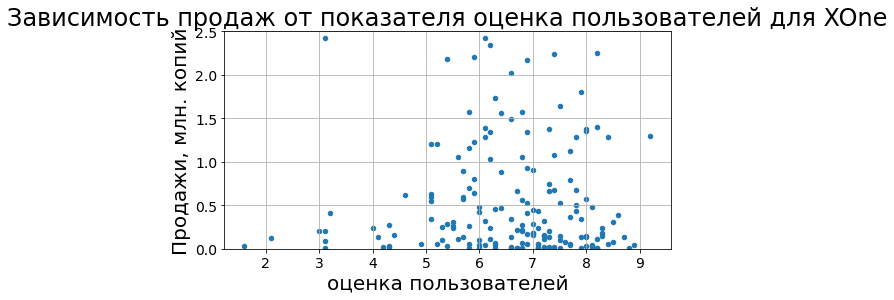

'Корреляция для платформы XOne'

-0.06892505328279412

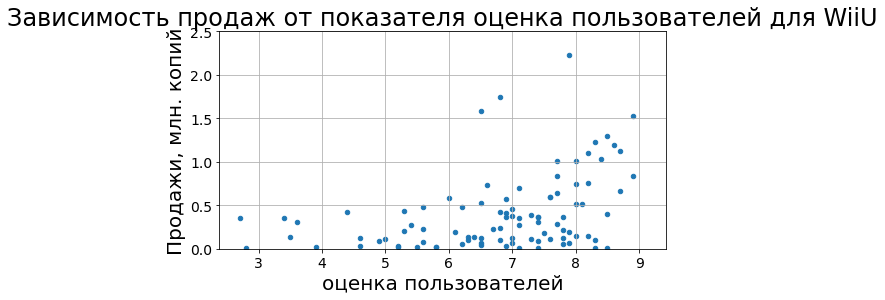

'Корреляция для платформы WiiU'

0.4002190202148617

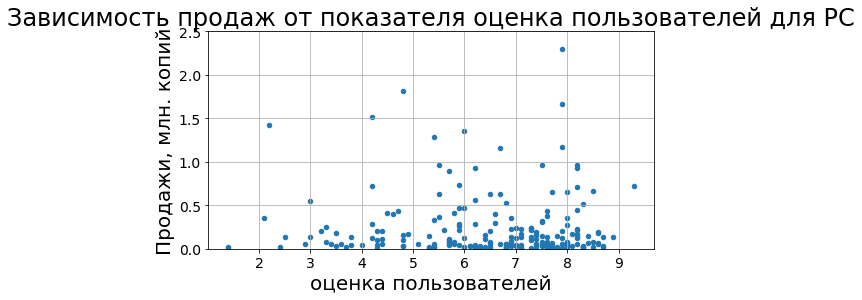

'Корреляция для платформы PC'

-0.12186747630735577

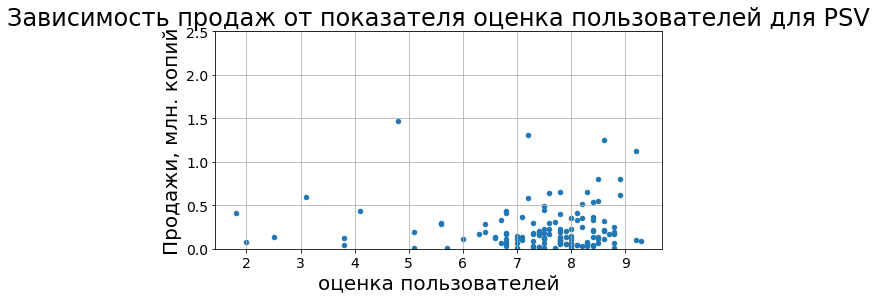

'Корреляция для платформы PSV'

-0.004339437514314869

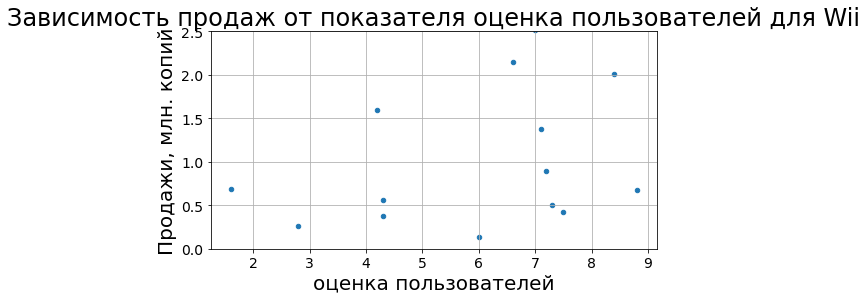

'Корреляция для платформы Wii'

0.2961968000747953

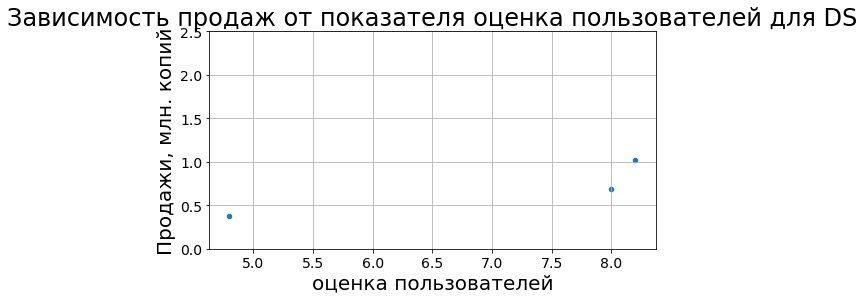

'Корреляция для платформы DS'

0.88270872757644

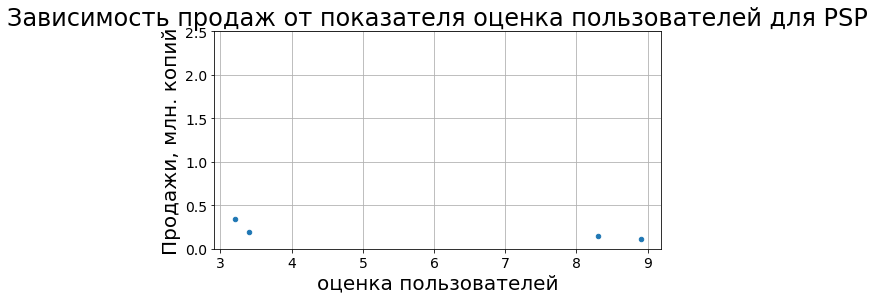

'Корреляция для платформы PSP'

-0.802302061939321

In [43]:
sc_cor('user_score', 'оценка пользователей')

**По полученным результатам видим для подавляющего большинства остальных платформ аналогичную платформе PS4 картину, а именно прямую, но не очень сильную, зависимость продаж от оценки критиков и отсутствие зависимости продаж от оценки пользователей. Только платформа 3DS показала слабую прямую зависимость от оценки пользователей, однако для общих прогнозов ей можно пренебречь, как незначительной. По графикам платформ Wii, DS и PSP видим явный недостаток данных для анализа, наблюдаем единичные точки или ошибку при попытке построения из-за недостатка данных, а также результат NaN расчёта корреляции или произвольные, неожиданные результаты, поэтому не будем принимать в расчёт результаты этих платформ.**

**Посмотрим на общее распределение игр по жанрам.**

In [44]:
data_genres = data_2012.pivot_table(index='genre', values='all_sales', aggfunc=['count', 'sum', 'mean'])
data_genres.columns=['count', 'total_sales', 'mean_sales']
data_genres = data_genres.sort_values(by='total_sales', ascending=False)
data_genres

,count,total_sales,mean_sales
genre,,,
Action,1031,441.12,0.427856
Shooter,235,304.73,1.296723
Role-Playing,370,192.80,0.521081
Sports,267,181.07,0.678165
Misc,192,85.04,0.442917
Platform,85,61.00,0.717647
Racing,115,53.50,0.465217
Fighting,109,44.49,0.408165
Simulation,80,35.12,0.439000


**Видим, что сильно выделяется по общему количеству игр жанр Action, тем самым он занимает первое место по общему количеству продаж, однако лучший показатель по среднему количеству продаж, причём с большим отрывом, у жанра Shooter. При том, что количество игр у него примерно в 4,5 раза меньше, чем у жанра Action, общее количество продаж у него меньше, чем у Action лишь на 31%. Жанр Shooter тем самым располагается на втором месте по общему количеству продаж и на первом месте по среднему количеству продаж. По большинству остальных игр можно сказать, что среднее количество продаж варьируется от 0,4 до 0,7 млн копий. Общая прибыль по ним варьируется в зависимости от количества выпускаемых игр.**
**Однако можно выделить в аутсайдеры 3 жанра, которые сильно выделяются:**
- Adventure - несмотря на большое количество игр (целых 302, что даже больше, чем у Shooter), общее и среднее количество продаж очень слабое;
- Strategy и Puzzle - игр мало, средние и соответственно общие продажи слабые.

**В ходе исследовательского анализа данных мы выяснили следующее:**
- с момента появления платформы на максимальные продажи она выходит в течение 3-5 лет, после чего идёт спад, при котором за 5-7 лет продажи падают до нуля, то есть полный жизненный цикл платформ составляет около 10 лет;
- определили актуальный для нас период, с 2012 года;
- определили перспективные в текущий момент платформы, это PS4 и XOne;
- изучили диаграммы размаха продаж по платформам, выявили большую вариативность данных, сделали вывод, что есть основная масса игр, укладывающаяся в общую статистику, но существует немалое количество игр, которые "выстреливают", и их показатели продаж значительно превышают среднестатистические;
- выяснили, что имеется прямая зависимость продаж от оценки критиков, но не очень сильная, а также отсутствие зависимости продаж от пользовательских оценок;
- определили, что сильно выделяется по общему количеству игр жанр Action, он же занимает первое место по общему количеству продаж, однако лучший показатель по среднему количеству продаж, причём с большим отрывом, у жанра Shooter. Также выделяются в аутсайдеры 3 жанра:Adventure, Strategy и Puzzle.

#### Шаг 4. Портрет пользователя каждого региона

**Определим для пользователя каждого региона (NA, EU, JP):**
- Самые популярные платформы (топ-5);
- Самые популярные жанры (топ-5);
- Влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [45]:
def platf_reg_rat (value):
    df = platf_reg(data_2012, value)
    df['ratio'] = df[value]/df[value].sum()
    return df

In [46]:
def pie_pl(df, reg):
    top_5 = df.nlargest(5, df.columns[0])
    other_sum = df[~df.index.isin(top_5.index)][df.columns[0]].sum()
    categories = list(top_5.index) + ['Другие']
    values = list(top_5[df.columns[0]]) + [other_sum]
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90)
    plt.title(f'Круговая диаграмма ТОП-5 платформ и остальные для региона {reg}')
    plt.axis('equal')
    plt.show()

,na_sales,ratio
platform,,
X360,140.05,0.236983
PS4,108.74,0.184003
PS3,103.38,0.174933
XOne,93.12,0.157571
3DS,55.31,0.093592
WiiU,38.10,0.064470
PC,19.12,0.032354
Wii,17.45,0.029528
PSV,10.98,0.018580


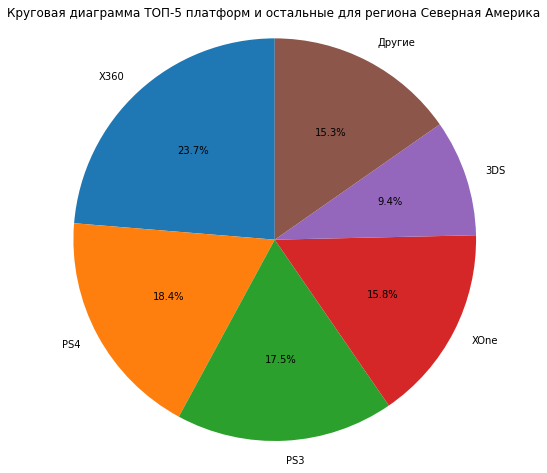

In [47]:
data_na = platf_reg_rat ('na_sales')
display(data_na)
pie_pl(data_na, 'Северная Америка')

,eu_sales,ratio
platform,,
PS4,141.09,0.278383
PS3,106.86,0.210844
X360,74.52,0.147034
XOne,51.59,0.101792
3DS,42.64,0.084132
PC,37.76,0.074504
WiiU,25.13,0.049584
Wii,11.92,0.023519
PSV,11.36,0.022414


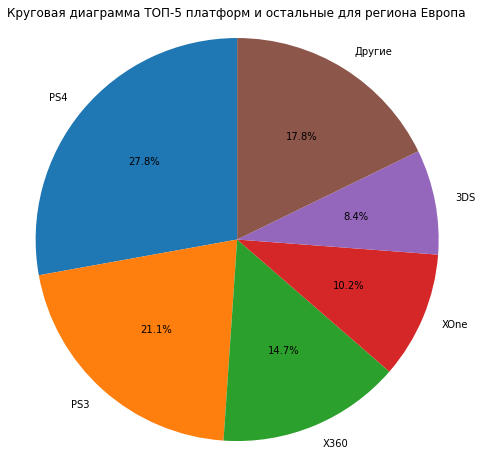

In [48]:
data_eu = platf_reg_rat ('eu_sales')
display(data_eu)
pie_pl(data_eu, 'Европа')

,jp_sales,ratio
platform,,
3DS,87.79,0.455862
PS3,35.29,0.183249
PSV,21.04,0.109253
PS4,15.96,0.082875
WiiU,13.01,0.067556
PSP,10.47,0.054367
DS,3.72,0.019317
Wii,3.39,0.017603
X360,1.57,0.008152


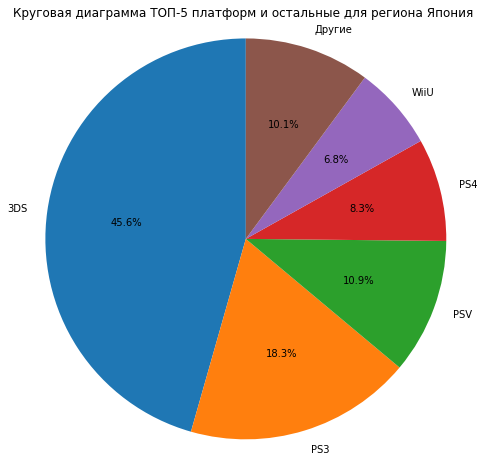

In [49]:
data_jp = platf_reg_rat ('jp_sales')
display(data_jp)
pie_pl(data_jp, 'Япония')

**Видим, что популярность платформ в разных регионах разнится:**
- в Северной Америке (NA) самой популярной является X360, она занимает 24% всех продаж в регионе;
- в Европе (EU) самой популярной является PS4, она занимает 28% всех продаж в регионе, а популярная в Северной Америке X360 только 15%;
- в Японии (JP) самой популярной, причём с большим отрывом, является 3DS, она занимает 46% всех продаж в регионе, а X360 вообще не входит в ТОП-5.

**Можно заметить, что лидером продаж в Северной Америке является американская платформа X360, а в Японии соответственно японская 3DS (В ТОПе Японии вообще находятся только японские платформы).**

**Определим самые популярные жанры (топ-5) в регионах.**

In [50]:
def genres_reg(value):
    df = data_2012.pivot_table(index='genre', values=value, aggfunc=['count', 'sum', 'mean'])
    df.columns=['count', 'total_sales', 'mean_sales']
    df = df.sort_values(by='total_sales', ascending=False)
    return df

In [52]:
def pie_g(df, reg):
    top_5 = df.nlargest(5, df.columns[1])
    other_sum = df[~df.index.isin(top_5.index)][df.columns[1]].sum()
    categories = list(top_5.index) + ['Другие']
    values = list(top_5[df.columns[1]]) + [other_sum]
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90)
    plt.title(f'Круговая диаграмма ТОП-5 жанров и остальные для региона {reg}')
    plt.axis('equal')
    plt.show()

,count,total_sales,mean_sales
genre,,,
Action,1031,177.84,0.172493
Shooter,235,144.77,0.616043
Sports,267,81.53,0.305356
Role-Playing,370,64.00,0.172973
Misc,192,38.19,0.198906
Platform,85,25.38,0.298588
Fighting,109,19.79,0.181560
Racing,115,17.22,0.149739
Adventure,302,8.92,0.029536


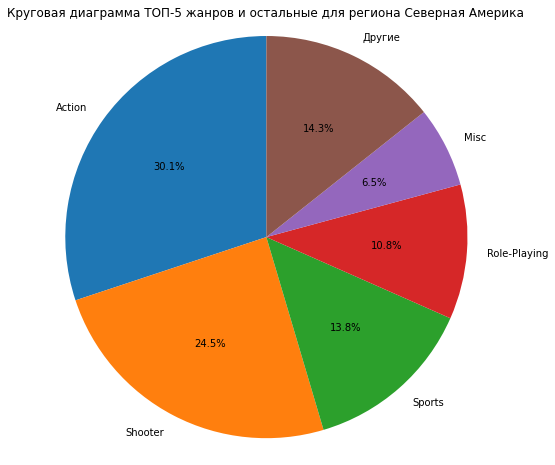

In [53]:
genres_na = genres_reg('na_sales')
display(genres_na)
pie_g(genres_na, 'Северная Америка')

,count,total_sales,mean_sales
genre,,,
Action,1031,159.34,0.154549
Shooter,235,113.47,0.482851
Sports,267,69.09,0.258764
Role-Playing,370,48.53,0.131162
Racing,115,27.29,0.237304
Misc,192,26.32,0.137083
Platform,85,21.41,0.251882
Simulation,80,14.55,0.181875
Fighting,109,10.79,0.098991


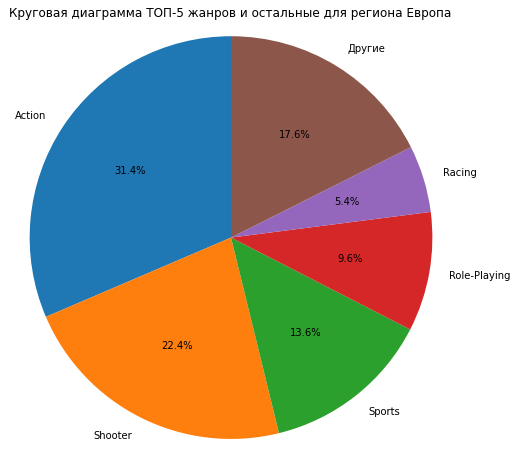

In [54]:
genres_eu = genres_reg('eu_sales')
display(genres_eu)
pie_g(genres_eu, 'Европа')

,count,total_sales,mean_sales
genre,,,
Role-Playing,370,65.44,0.176865
Action,1031,52.80,0.051212
Misc,192,12.86,0.066979
Simulation,80,10.41,0.130125
Fighting,109,9.44,0.086606
Shooter,235,9.23,0.039277
Platform,85,8.63,0.101529
Adventure,302,8.24,0.027285
Sports,267,8.01,0.030000


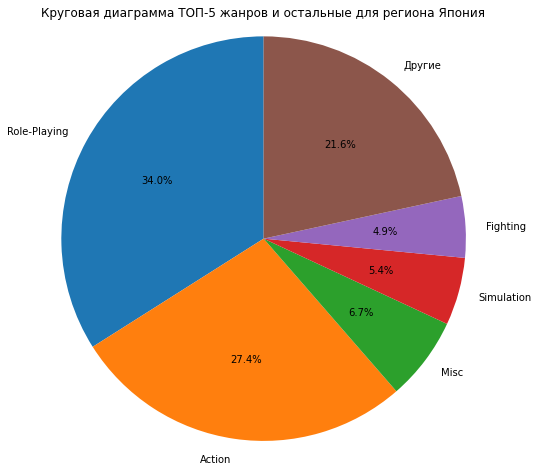

In [55]:
genres_jp = genres_reg('jp_sales')
display(genres_jp)
pie_g(genres_jp, 'Япония')

**В Северной Америке и в Европе статистика очень похожа. Самым популярным жанром в этих регионах является Action, и в целом первые 4 места в ТОПах совпадают. В Японии же картина получается другая, здесь на первое место выходит жанр Role-Playing, на 25% опережая по общему количеству продаж жанр Action. В добавок в ТОПе Японии среди прочих находятся жанры Simulation	и Fighting, которые не попали в ТОПы Северной Америки и Европы, а Sport и Shooter, уверенно занимавшие 2 и 3 место в ТОПах Северной Америки и Европы, в Японии наоборот не попали в ТОП. Такое различие в популярности жанров объясняется разницей в культуре Запада и Востока.**

**Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.**

In [56]:
def rating_reg(value):
    df = data_2012.pivot_table(index='rating', values=value, aggfunc=['count', 'sum', 'mean'])
    df.columns=['count', 'total_sales', 'mean_sales']
    df = df.sort_values(by='total_sales', ascending=False)
    return df.head()

In [57]:
def pie_r(df, reg):
    categories = list(df.index)
    values = list(df[df.columns[1]])
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90)
    plt.title(f'Круговая диаграмма рейтингов ESRB для региона {reg}')
    plt.axis('equal')
    plt.show()

,count,total_sales,mean_sales
rating,,,
M,498,231.57,0.465000
E,394,114.37,0.290279
E10+,306,75.70,0.247386
T,412,66.02,0.160243


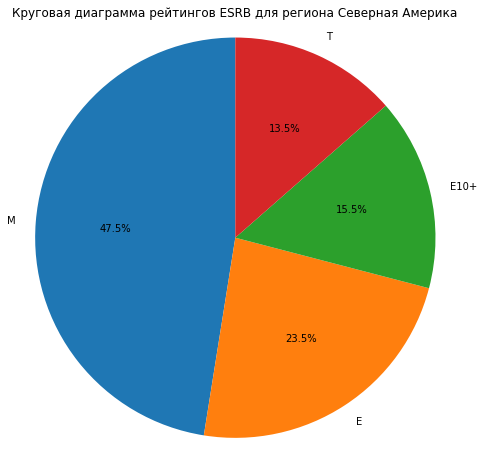

In [58]:
rating_na=rating_reg('na_sales')
display(rating_na)
pie_r(rating_na, 'Северная Америка')

,count,total_sales,mean_sales
rating,,,
M,498,193.96,0.389478
E,394,113.03,0.286878
E10+,306,55.37,0.180948
T,412,52.96,0.128544


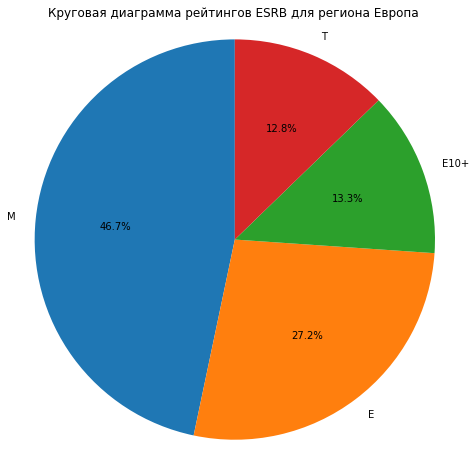

In [59]:
rating_eu=rating_reg('eu_sales')
display(rating_eu)
pie_r(rating_eu, 'Европа')

,count,total_sales,mean_sales
rating,,,
E,394,28.33,0.071904
T,412,26.02,0.063155
M,498,21.20,0.042570
E10+,306,8.19,0.026765


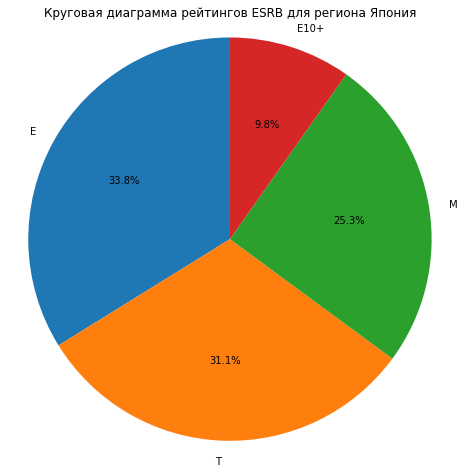

In [60]:
rating_jp=rating_reg('jp_sales')
display(rating_jp)
pie_r(rating_jp, 'Япония')

**В Северной Америке и в Европе, как и в статистике жанров, картина одинаковая. Больше всего продаж в этих регионах у игр с рейтингом M. В Японии статистика немного отличается, здесь на первом месте по продажам игры с рейтингом E. Взаимосвязь с продажами есть, но как и в ситуации с жанрами, разнится из-за разной культуры регионов.**

**На данном этапе мы составили портрет пользователя каждого региона:**
- в Северной Америке самой популярной является платформа X360, самый популярный жанр Action, с рейтингом ESRB "M"
- в Европе самой популярной является платформа PS4, самый популярный жанр Action, с рейтингом ESRB "M"
- в Японии самой популярной является платформа 3DS, самый популярный жанр Role-Playing, с рейтингом ESRB "E".

#### Шаг 5. Проверка гипотез

**Проверим гипотезы:**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Так как мы имеем две независимые выборки, будем использовать метод `scipy.stats.ttest_ind` для проверки гипотезы о равенстве средних двух генеральных совокупностей. За нулевую гипотезу возьмём предположение, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а за альтернативную - что они не равны, и сделаем проверку двусторонней гипотезы, так как нам не важно, в какую сторону будет отклонение, в большую или меньшую. Тест данной гипотезы не имеет повышенной важности, поэтому примем достаточный в данному случае уровень статистической значимости 0.05, и если по результатам теста P-значение будет меньше уровня статистической значимости, то отвергнем нулевую гипотезу и примем альтернативную. Так как генеральные совокупности небольшие для теста будем брать полные генеральные совокупности, а не выборки.**

**Нулевая гипотеза H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

**Альтернативная гипотеза H1 - средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.**

In [61]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
sample_1 = data_2012[data_2012['platform']=='XOne']['user_score'].dropna()
sample_2 = data_2012[data_2012['platform']=='PC']['user_score'].dropna()

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


**По результату теста не получилось отвергнуть нулевую гипотезу, значит принимаем наше предположение о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

**Проверим гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Так как мы имеем две независимые выборки, аналогично прошлой гипотезе будем использовать метод scipy.stats.ttest_ind для проверки гипотезы о равенстве средних двух генеральных совокупностей, однако в отличие от прошлого примера, за нулевую гипотезу мы возьмём обратную нашему заданию, что средние пользовательские рейтинги жанров Action и Sports равны, а за альтернативную гипотезу - что они не равны. Примем уровень статистической значимости 0.05, и если по результатам теста P-значение будет меньше уровня статистической значимости, то отвергнем нулевую гипотезу и примем альтернативную.**

**Нулевая гипотеза H0 - средние пользовательские рейтинги жанров Action и Sports равны.**

**Альтернативная гипотеза H1 - средние пользовательские рейтинги жанров Action и Sports не равны.**

In [62]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
sample_1 = data_2012[data_2012['genre']=='Action']['user_score'].dropna()
sample_2 = data_2012[data_2012['genre']=='Sports']['user_score'].dropna()

results = st.ttest_ind(sample_1, sample_2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


**По результату теста отвергается нулевая гипотеза, а именно, что средние пользовательские рейтинги жанров Action и Sports равны, значит принимаем гипотезу, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

**На данном этапе были проверены 2 гипотезы, в результате которых было принято, что:**
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Шаг 6. Общий вывод

**Целью данного проекта было выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. В ходе проекта была проведена предобработка данных и проведен исследовательский анализ данных, в ходе которого получена следующая информация:**
- с момента появления платформы на максимальные продажи она выходит в течение 3-5 лет, после чего идёт спад, при котором за 5-7 лет продажи падают до нуля, то есть полный жизненный цикл платформ составляет около 10 лет;
- определили актуальный для нас период, с 2012 года;
- определили перспективные в текущий момент платформы, это PS4 и XOne;
- изучили диаграммы размаха продаж по платформам, выявили большую вариативность данных, сделали вывод, что есть основная масса игр, укладывающаяся в общую статистику, но существует немалое количество игр, которые "выстреливают", и их показатели продаж значительно превышают среднестатистические;
- выяснили, что имеется прямая зависимость продаж от оценки критиков, но не очень сильная, а также отсутствие зависимости продаж от пользовательских оценок;
- определили, что сильно выделяется по общему количеству игр жанр Action, он же занимает первое место по общему количеству продаж, однако лучший показатель по среднему количеству продаж, причём с большим отрывом, у жанра Shooter. Также выделяются в аутсайдеры 3 жанра:Adventure, Strategy и Puzzle.

**Затем был составлен портрет пользователя каждого региона:**
- в Северной Америке самой популярной является платформа X360, самый популярный жанр Action, с рейтингом ESRB "M"
- в Европе самой популярной является платформа PS4, самый популярный жанр Action, с рейтингом ESRB "M"
- в Японии самой популярной является платформа 3DS, самый популярный жанр Role-Playing, с рейтингом ESRB "E".

**Затем были проверены 2 гипотезы, в результате которых было принято, что:**
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Опираясь на полученные результаты, можно сделать следующие рекомендации для организации рекламных кампаний:**
- сделать упор на платформы PS4 в Европе и XOne в Северной Америке (так как она показала себя перспективной, находится на стадии роста и является платформой, пришедшей на смену X360, которая в предыдущие годы также показала хорошие результаты и являлась в этом регионе самой популярной), на игры в жанре Action, с рейтингом ESRB "M", с высокими оценками критиков. Однако необходимо сделать уточнение, что необходимо взять в расчёт тип рекламной кампании. Упор на жанр Action целесообразен в случае рекламной кампании, направленной на жанр в целом, если же рекламная кампания будет нацелена на конкретные игры, то бОльшие результаты она принесёт в жанре Shooter.
- в Японии сделать упор на платформу 3DS, на игры в жанре Role-Playing, с рейтингом ESRB "E", с высокими оценками критиков. Однако в целом в этом регионе продажи слабее, чем в Северной Америке и Европе, поэтому в случае ограниченности ресурсов целесообразнее направить их в первую очередь именно на рекламную кампанию в Северной Америке и Европе, а уже потом на Японию.